In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, zscore
import statsmodels.api as sm

In [4]:
df_irrigaçao = pd.read_csv("dados_de_irrigacao.csv")
df_irrigaçao.head(10)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333
5,6,600,400.000000
6,7,700,466.666667
7,8,800,533.333333
8,9,900,600.000000
9,10,1000,666.666667


Analise Explorátoria - EDA

In [6]:
# Verificar Valores Nulos
df_irrigaçao.isna().sum()

,0
Horas de Irrigação,0
Área Irrigada,0
Área Irrigada por Ângulo,0


In [7]:
# Estrutura do dataset
df_irrigaçao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Horas de Irrigação        299 non-null    int64  
 1   Área Irrigada             299 non-null    int64  
 2   Área Irrigada por Ângulo  299 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 7.1 KB


In [8]:
# Calculos estatisticos
df_irrigaçao.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


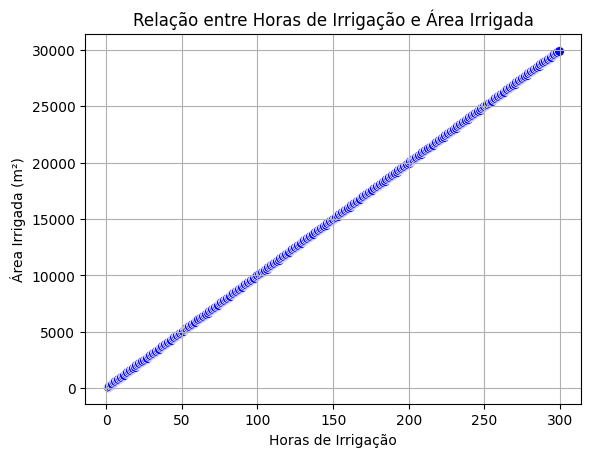

In [12]:
# Gráfico de dispersão
# X = Irrigação
# Y = Area Irrigada por angulo

sns.scatterplot(data=df_irrigaçao, x='Horas de Irrigação', y='Área Irrigada', color='blue', s=50)
plt.title("Relação entre Horas de Irrigação e Área Irrigada")
plt.xlabel("Horas de Irrigação")
plt.ylabel("Área Irrigada (m²)")
plt.grid(True)
plt.show()


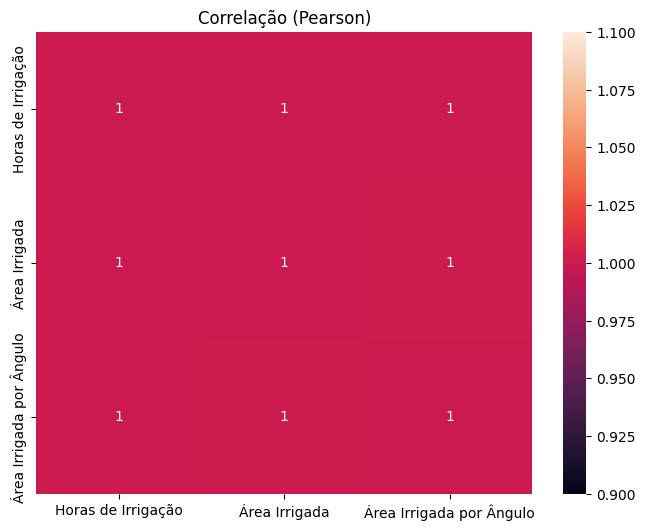

In [13]:
# Correlações
plt.figure(figsize=(8, 6))
sns.heatmap(df_irrigaçao.corr(method='pearson'), annot=True)
plt.title('Correlação (Pearson)')
plt.show()

O gráfico mostra uma correlação linear positiva forte. Quanto mais horas de Irrigação, maior a área irrigada.

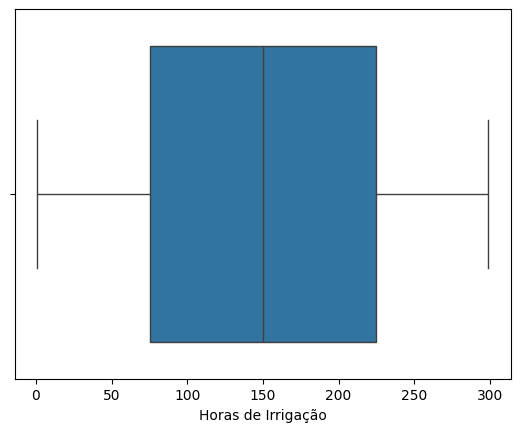

In [14]:
# Detectar Outliers nas variaveis independentes
sns.boxplot(data=df_irrigaçao, x='Horas de Irrigação')
plt.show()

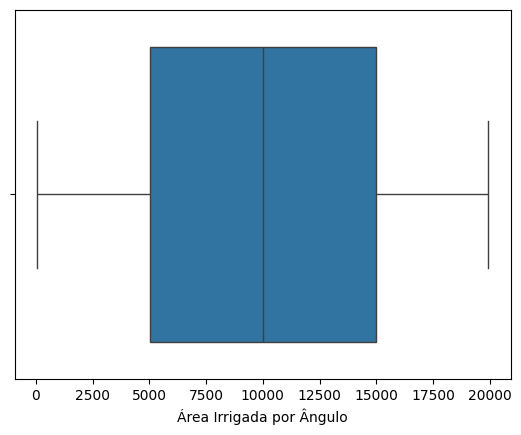

In [15]:
sns.boxplot(data=df_irrigaçao, x='Área Irrigada por Ângulo')
plt.show()

Treinar Modelo - Regressão Linear

In [16]:
# Dividir o dataset entre treino e teste
X = df_irrigaçao['Horas de Irrigação'].values.reshape(-1,1)
y = df_irrigaçao['Área Irrigada por Ângulo'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [17]:
# Instanciar e treinar o modelo
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Equação da reta
coeficiente = reg_model.coef_[0][0]
intercepto = reg_model.intercept_[0]
print(f"A equação da reta é: y = {coeficiente} x + {intercepto}")

A equação da reta é: y = 66.66666666666667 x + 1.8189894035458565e-12


Validação do Modelo

In [21]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

# Métrica MAE (Mean Absolute Error) e MSE (Mean Squared Error)
mse = ((y_test - y_pred) ** 2).mean()
mae = (abs(y_test - y_pred)).mean()

print(f"MSE: {mse}")
print(f"MAE: {mae}")

MSE: 8.248757082420076e-24
MAE: 2.559848629365054e-12


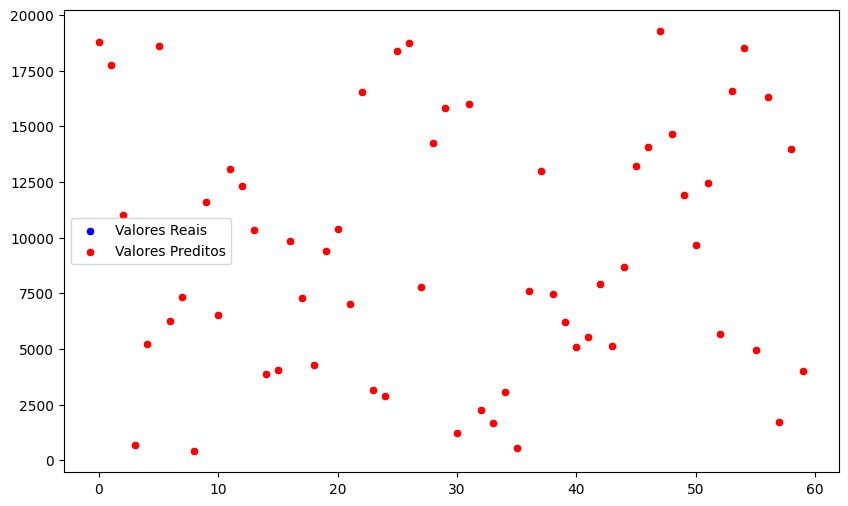

In [22]:
# Análise Gráfica
plt.figure(figsize=(10,6))
sns.scatterplot(x=range(len(y_test)), y=y_test.flatten(), color='blue', label='Valores Reais')
sns.scatterplot(x=range(len(y_test)), y=y_pred.flatten(), color='red', label='Valores Preditos')
plt.legend()
plt.show()

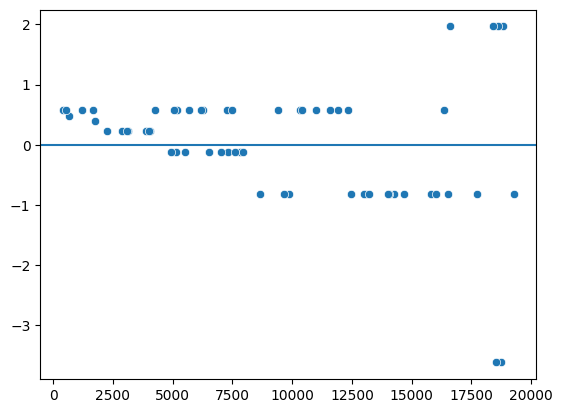

In [23]:
# Análise dos Résiduos
residuos = y_test - y_pred
residuos_std = zscore(residuos)

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)
plt.show()

In [24]:
# Teste de Normalidade - Shapiro Wilk
# H0 - Segue distribuição normal
# H1 - Não segue distribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrário rejeitamos
stat_shapiro, p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatística do teste: {} e P-Valor: {}".format(stat_shapiro, p_valor_shapiro))

Estatística do teste: 0.8257789034978339 e P-Valor: 6.30484274675335e-07


Fazer Predições com o Modelo

In [25]:
horas_exemplo = ([[15]])
area_predita = reg_model.predict(horas_exemplo)
print(f"Para 15 horas de irrigação, a área irrigada por ângulo prevista é: {area_predita[0][0]}")

Para 15 horas de irrigação, a área irrigada por ângulo prevista é: 1000.0000000000019


INSIGHTS GERAIS SOBRE A ANÁLISE

A relação entre as horas de irrigação e a área irrigada por ângulo é totalmente linear, quase perfeita visivelmente na reta obtida.

No desempenho pelas métricas de erro(MSE E MAE) mostram que o modelo linear conseguiu previsões bem próximas do real.

Na Análise de Residuos não evidencia suficiente para dizer que os residuos fogem da normalidade.

O modelo está apto para ser usado para
fazer previsões sobre a área irrigada por
ângulo dada uma quantidade específica de
horas de irrigação.